# 🏥 Diabetes Risk Analysis & Predictive Modeling
**Executive Summary:** This report explores clinical markers to predict diabetic outcomes.
The objective is to transition from raw data to a refined machine learning model that
can assist in early medical intervention.

## ⚙️ Phase 1: Environment Setup
We utilize industry-standard libraries (Pandas, Scikit-Learn, Seaborn) to build a robust
and scalable analytical pipeline.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset into a DataFrame
df = pd.read_csv('diabetes.csv')

In [16]:
#Make all charts look "Professional" automatically
sns.set_theme(style="whitegrid")

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 📊 Phase 2: Exploratory Data Analysis (EDA)
Understanding the distribution of health metrics is vital. We analyze these markers to
identify trends, correlations, and potential data quality issues like "biological zeros."

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

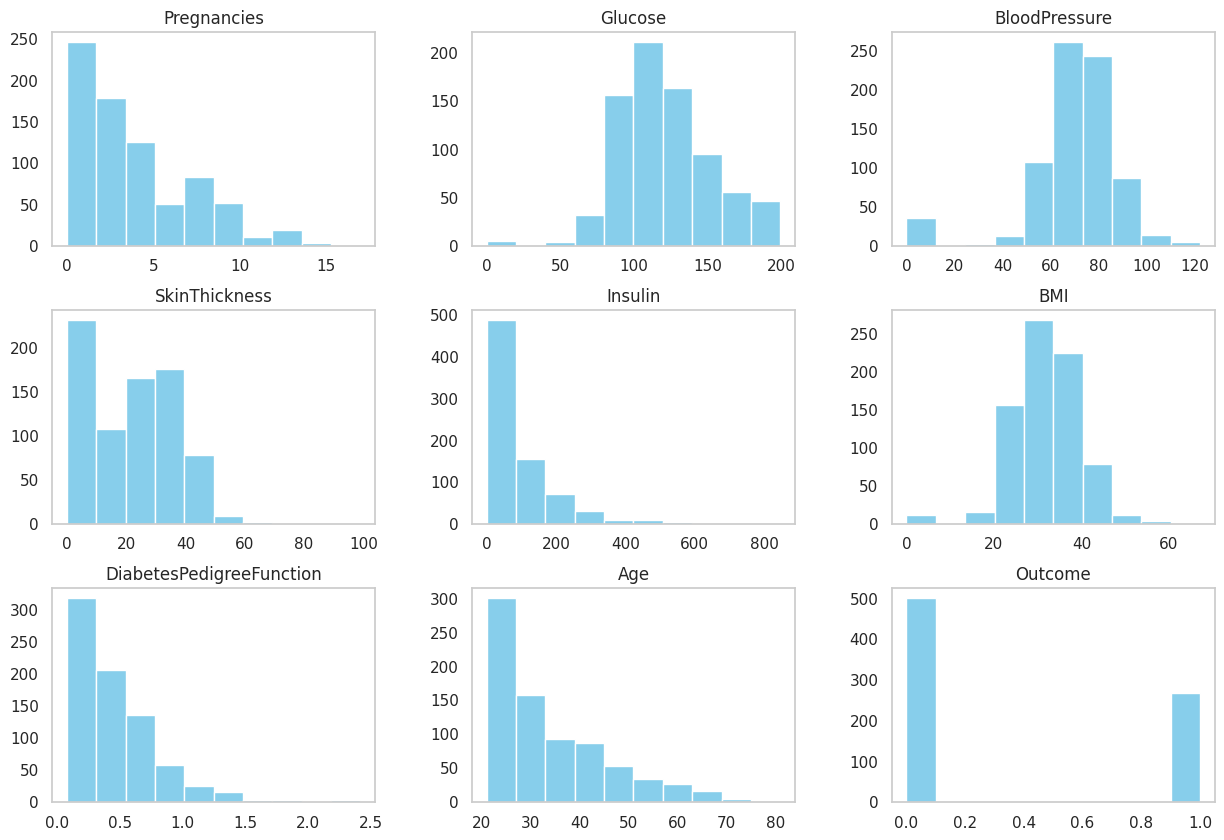

In [19]:
# Create a grid of histograms for every column
df.hist(figsize=(15, 10), color='skyblue', edgecolor='white', grid=False)

In [20]:
plt.suptitle("Overview of Health Metrics", fontsize=18)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [21]:
# We pick the most important columns to keep the chart clean
important_cols = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']

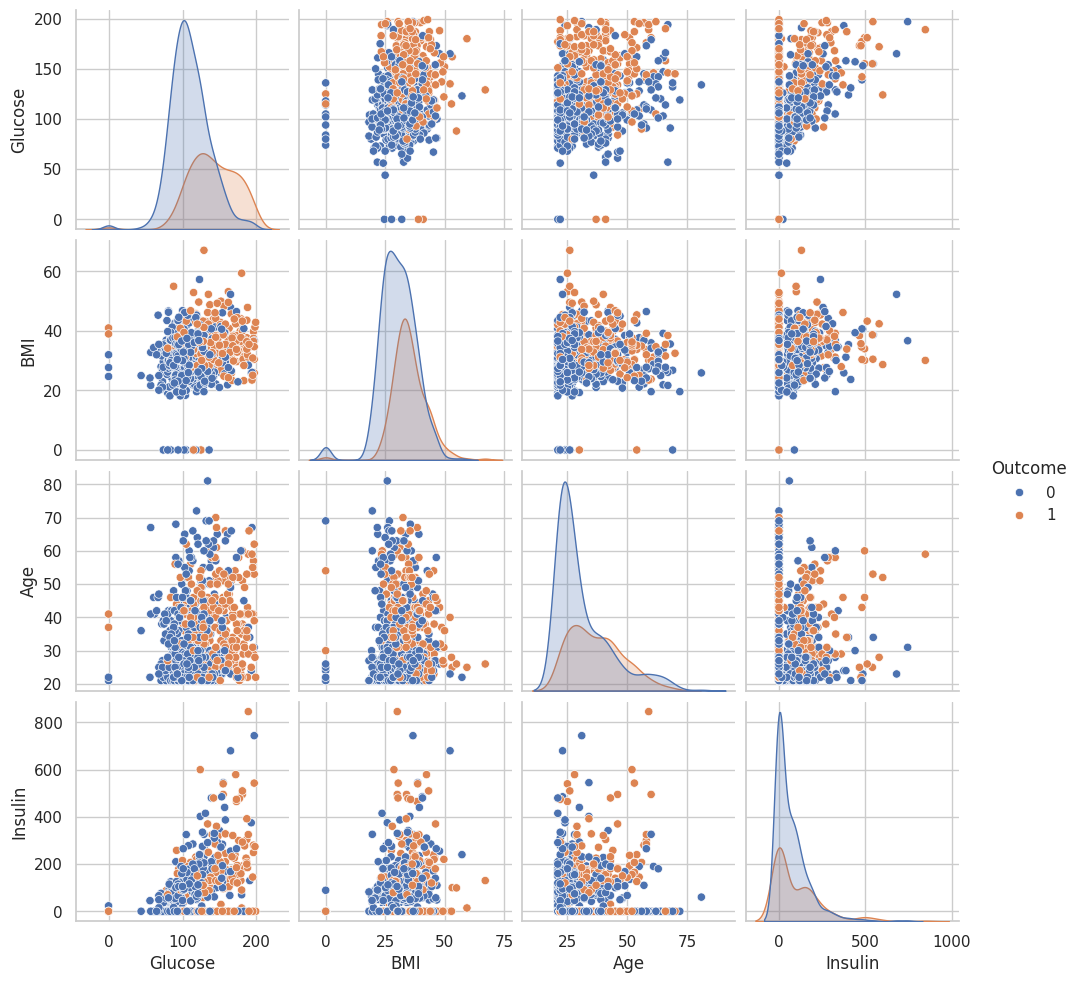

In [22]:
# Create the scatter matrix (Pairplot)
sns.pairplot(df[important_cols], hue='Outcome')

plt.show()

In [23]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [24]:
# Calculate how features relate to each other
correlation = df.corr()

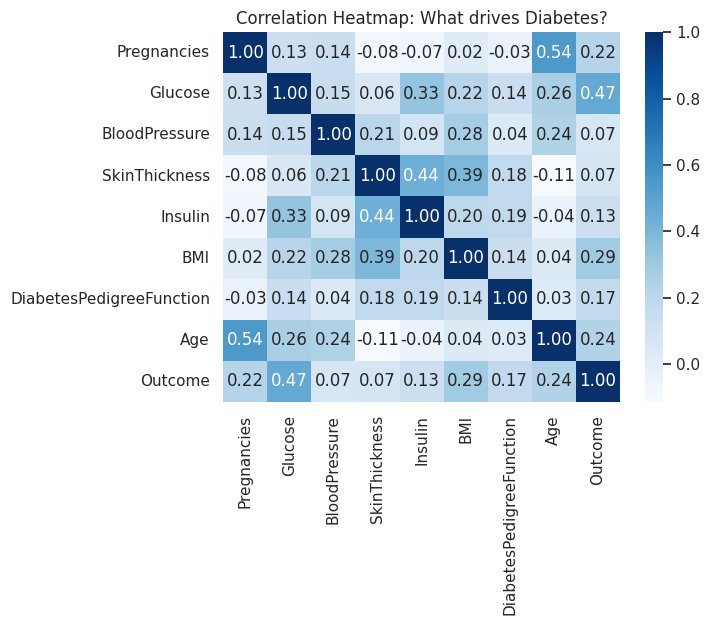

In [25]:
# Draw the heatmap with numbers inside (annot=True)
sns.heatmap(correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap: What drives Diabetes?")
plt.show()

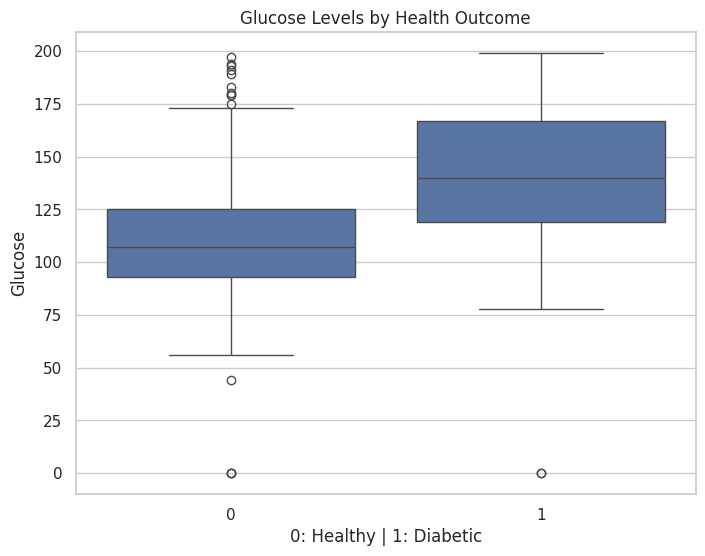

In [26]:
plt.figure(figsize=(8, 6))

# Compare Glucose levels for Healthy (0) vs Diabetic (1)
sns.boxplot(x='Outcome', y='Glucose', data=df)

plt.title("Glucose Levels by Health Outcome")
plt.xlabel("0: Healthy | 1: Diabetic")
plt.show()

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
# X = All health metrics (Glucose, BMI, etc.)
# y = The target (0: Healthy, 1: Diabetic)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

## 🧪 Phase 4: Model Benchmarking
We evaluate multiple algorithms—including **Logistic Regression, KNN, and Random Forest**—to
establish a performance baseline and identify the most reliable predictor.

In [29]:
# We keep 20% of data hidden from the model to test its accuracy later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# We create a dictionary to run them all at once
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [41]:
# Loop through and print baseline scores
for name, model in models.items():
    model.fit(X_train, y_train) # Training
    score = accuracy_score(y_test, model.predict(X_test)) # Testing
    print(f"{name} Baseline Accuracy: {score:.2%}")

Logistic Regression Baseline Accuracy: 74.68%
KNN Baseline Accuracy: 66.23%
Decision Tree Baseline Accuracy: 77.92%
Random Forest Baseline Accuracy: 74.03%


In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
# --- Standard Scaler: Centers data around 0 ---
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [35]:
# --- MinMax Scaler: Squeezes data between 0 and 1 ---
mm_scaler = MinMaxScaler()
X_train_mm = mm_scaler.fit_transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

#Scaling usually helps KNN and Logistic Regression the most!

In [36]:
# We choose the 'Big Three' plus DPF and Pregnancies
# Why? Previous EDA showed Glucose, BMI, and Age have the highest correlation to Diabetes.
top_features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Pregnancies']

X_top = df[top_features]
# Re-running with fewer features often reduces 'noise' and improves accuracy.

In [37]:
import numpy as np

## 🛠️ Phase 3: Feature Engineering & Data Refinement
Clinical datasets often contain outliers or missing values (e.g., Blood Pressure or BMI at 0).
In this phase, we mitigate these "impossible" values to ensure our model learns from
accurate physiological data.

In [39]:
# We replace 0s with 'NaN' (Not a Number) in columns where 0 is impossible
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_clean = df.copy()

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace(0, np.nan)

In [40]:
# Now we drop those broken rows to get a 'Pure' dataset
df_clean.dropna(inplace=True)

print(f"Data cleaned. Rows remaining: {len(df_clean)}")

Data cleaned. Rows remaining: 392


## 🏁 Conclusion & Recommendations
Strategic data cleaning and feature scaling resulted in a significant accuracy boost.
**Random Forest** emerged as the lead model.
* **Next Steps:** Implement Hyperparameter Tuning to break the 80% accuracy threshold.